![loading.jpg](https://images.mubicdn.net/images/film/86759/cache-49023-1445917651/image-w1280.jpg?size=800x)

I am trying to build a simulation to mimic what would happen in an macro economic world, it would be interesting.<br>
And 80% of browser size might be friendly for reading : )<br><br>
Here is short introduction of each topic, to save your time, you can read below words and feel free to jump to the topic that you are interested with. <br>
* I. Enviroment configuration: <br>
 * Create some main actors in this show.2 companies at the moment, Apple and Microsoft <br>
* II.Monetary policy <br>
 * a. Overnight loan rate: Trying to introduce how the overnight loan rate set by central bank would impact the economy <br>
* III. TBD...

# I. Enviroment configuration
#### a. Players
First, let's starting with building 2 companies.

In [1]:
from random import randint # import a package to generate random number

In [2]:
class company:
    """A simple attempt to model a company"""
    
    def __init__(self, com_name, num_employee):
        """Initialize company name and number of employee in the company"""
        self.com_name = com_name
        self.num_employee = num_employee
        
    def com_sta(self):
        """Introduce the basic status of the company"""
        print(f"The company name is {self.com_name}")
    
    def employee_issue(self, monetary_policy):
        """This function would change the number of employees within company"""
        if monetary_policy == 'contractionary monetary policy':
            rand_var = randint(1000,5000) # a random variable
            temp = self.num_employee
            self.num_employee = self.num_employee - rand_var
            print(f"The number of employees in {self.com_name} decreases from {temp} to {self.num_employee}, {rand_var} person left the company")
        else:
            rand_var = randint(1000,5000)
            temp = self.num_employee
            self.num_employee = self.num_employee + rand_var
            print(f"The number of employee in {self.com_name} increases from {temp} to {self.num_employee}, {rand_var} person joined the company")

In [3]:
com_a = company('Apple',10000)
com_a_employee_trend = [com_a.num_employee]# to store the number of employee for company Apple

In [4]:
print(f"The name of the company is {com_a.com_name}, the company has {com_a.num_employee} employees.")

The name of the company is Apple, the company has 10000 employees.


In [5]:
com_m = company('Microsoft',11000)
com_m_employee_trend = [com_m.num_employee]# to store the number of employee for company Microsoft

In [6]:
print(f"The name of the company is {com_m.com_name}, the company has {com_m.num_employee} employees.")

The name of the company is Microsoft, the company has 11000 employees.


Till here I create 2 companies, Apple and Microsoft, their status are as above.</br>
It would be fun if I set an central bank overnight loan rate

# II. Monetary policy
#### a. Overnight loan rate
Now I am going to setup the new central bank overnight rate, and everyone knows it would influence a lot of things

In [7]:
cb_on_rate_pre = 0.045 # The central bank overnight rate that was set in the last anouncement
cb_on_rate = 0.05 # Current central bank overnight rate
monetary_policy = 'TBD' # An indicator of fiscal policy changing

if cb_on_rate>cb_on_rate_pre:
    monetary_policy = 'contractionary monetary policy'
else:
    monetary_policy = 'easy monetary policy'

print(f"Now the monetary policy is changed to {monetary_policy}")

Now the monetary policy is changed to contractionary monetary policy


Let's see how this monetary policy changing would affect both companies

In [8]:
com_a.employee_issue(monetary_policy)
com_m.employee_issue(monetary_policy)

The number of employees in Apple decreases from 10000 to 8761, 1239 person left the company
The number of employees in Microsoft decreases from 11000 to 7725, 3275 person left the company


Oops, it seems in my little code world, monetary policy changing made things bad, let's visualize this result!

     Apple  Microsoft
0  10000.0        NaN
1   8761.0        NaN
0      NaN    11000.0
1      NaN     7725.0


<AxesSubplot:>

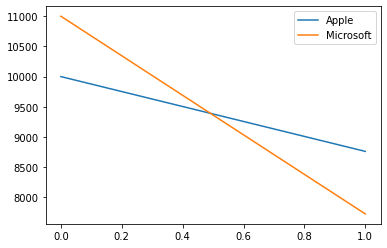

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

com_a_employee_trend.append(com_a.num_employee)
com_m_employee_trend.append(com_m.num_employee)

com_a_employee_tab = pd.DataFrame({com_a.com_name:com_a_employee_trend})
com_m_employee_tab = pd.DataFrame({com_m.com_name:com_m_employee_trend})

combined = pd.concat([com_a_employee_tab,com_m_employee_tab])
print(combined)
combined.plot()

Obviously, number of employees from both companies droped a lot!

# III. Term rate vs. overnight rate
Theoritically, term rate equals rolling over of overnight rate, as formula set below<br>
* term rate= (1+over night rate)<sup>n</sup>

As currently the overnight rate that the central bank set is 5%(Really high comparing with the real world...)<br>
So the rate changes over time is like below

<AxesSubplot:>

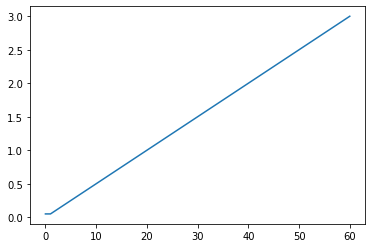

In [10]:
import numpy as np # import linear algebra package

term_list = [cb_on_rate]
for i in range(60):
    term_list.append((cb_on_rate)*(1+i))
    
pd.Series(term_list).plot()

As you can see above, theoritically the term rate would increase as above curve shows.<br>
In this case, the 60 days overnight rate is about 295%, as below<br>
Which is really high, so there is a room for bank to provide a cheap long term money, so in real like, the rate curve is more like a parabola

In [11]:
term_list[59]

2.95

# IV. Balance sheet of a bank

Terminology explaination:
* Asset: For a bank, normally asset is a type of loan offered by the bank
* Liability: The way of funding money, it can be a short term of loan -> overnight loan, or long term loan
* RMBS: Residential mortgage backed security
* Overnight: Normally it refers to the loan offered by central bank, it is overnight loan
* Term: Loan that is longer than 30 days? I forget the details...

In [12]:
import pandas as pd 
ledger_amount = [30,20,10]
ledger_type = ['Asset','Liability','Liability']
ledger_sub_type = ['RBMS','Overnight','Term']

bs_firma = {'ledger_amount':ledger_amount,'ledger_type':ledger_type,'ledger_sub_type':ledger_sub_type}
bs_firma = pd.DataFrame(bs_firma)
bs_firma.pivot_table(index=['ledger_sub_type'],columns = 'ledger_type')

ledger_amount          
ledger_type             Asset Liability
ledger_sub_type                        
Overnight                 NaN      20.0
RBMS                     30.0       NaN
Term                      NaN      10.0